<a href="https://colab.research.google.com/github/lucascatunda/Imersao_dados_4_2022_Alura/blob/main/Imersao_dados_2022-Dados_Im%C3%B3veis_Sao_Paulo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

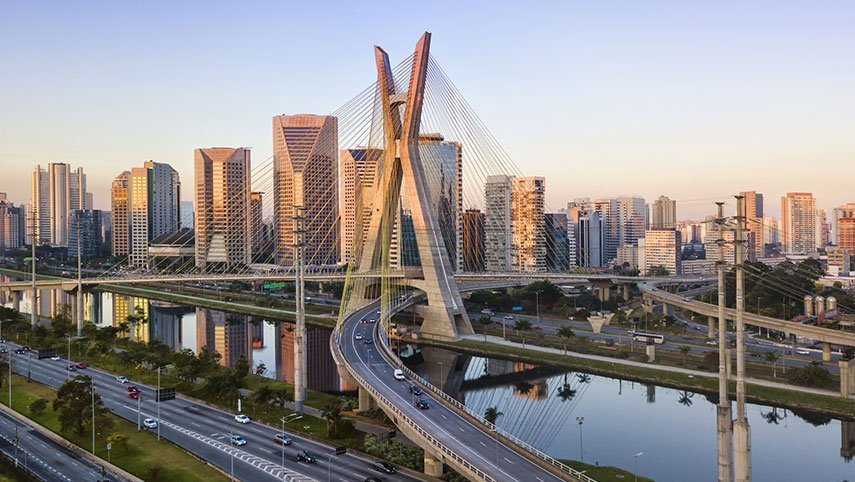

# Imersão Dados 2022 - Tratamento de dados e estimativa de Preço Imobiliário da Cidade de São Paulo

# Sumário

### 1. Introdução
### 2. Objetivos
### 3. Métodos/Resultados e Discussão


*   Realizar o processo de data cleaning dos dados (Kaggle);
*   Realizar análise descritiva dos dados;
*   Avaliar correlação entre as variáveis presentes;
*   Unificar os dados devidamente tratados (Kaggle) com os dados obtidos pelo IBGE (2010);
*   Avaliar novamente correlações entre as variáveis e realizar a análise descritiva entre os dois banco de dados, e
*   Aplicar métodos de aprendizagem por máquina para estimar o valor do imóvel na cidade de São Paulo.

### 4. Conclusões
### 5. Agradecimentos





# 1.   Introdução

  Segundo dados do [IBGE (2010)](https://cidades.ibge.gov.br/brasil/sp/sao-paulo/pesquisa/23/47427), a cidade de São Paulo apresentou no total aproximadamente 3.6 milhões de domícílios. Os dados disponíveis pelo IBGE apresentam algumas descrições como o número de bens duráveis (geladeira, carro, computador) disponíveis na residência; a densidade de moradores por dormitório e a situação domiliciar (Rural, doméstico). No entanto, os dados não apresentam a descrição da casa (Nº de Quartos, nº de banheiros e metragem por exemplo) para avaliar mais características dos imóveis em São Paulo. Tais informações são importantes para avaliar as condições em que os familiares vivem e, além disso,  podem ser utilizados para estimar o preço de novos imóveis com base em suas características. 

  Este relatório, portanto, foi desenvolvido para avaliar as características dos imóveis de São Paulo e desenvolver um modelo computacional que possa estimar o preço de novos imóveis a partir de valor de vendas de imóveis catalogados até então.

  Para isso, primeiramente importamos um [conjunto de dados](https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv) disponibilizado pelo time Alura, via Kaggle, e sequencialmente realizamos a etapa de data cleaning para posteriormente melhor extrairmos os dados e atribuirmos valores com base nos resultados obtidos. Em seguida, vinculamos os dados tratados com os dados do IBGE 2010 para enriquecer informações em relação aos imóveis de São Paulo.










# 2. Objetivos


*   Realizar o processo de data cleaning dos dados (Kaggle);
*   Realizar análise descritiva dos dados;
*   Avaliar correlação entre as variáveis presentes;
*   Unificar os dados devidamente tratados (Kaggle) com os dados obtidos pelo IBGE (2010);
*   Avaliar novamente correlações entre as variáveis e realizar a análise descritiva entre os dois banco de dados, e
*   Aplicar métodos de aprendizagem por máquina para estimar o valor do imóvel na cidade de São Paulo.





# 3. Métodos/Resultados e Discussão

## Data Cleaning dos Imóveis de São Paulo

### Importando os dados para o datasheet

Primeiramente, vamos importar o banco de dados para o nosso notebook. Para isso, primeiramente, importamos os banco de dados e chamados o conteúdo presente no github.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
caminho = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"


A Partir do pacote pandas, foi possível fazer a conversão do texto (.csv) em uma tabela estruturada para melhor tratamento dos dados.

In [2]:
df = pd.read_csv(caminho)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


## Conversão dos dados na tabela "Valor" (object) em float para construção de gráficos.

Quando analisamos a coluna "Valor", o programa nos retorna um object e não um valor real do preço. Analisando melhor a coluna. Ela apresenta dois problemas:

1 - Ela apresenta o símbolo R$ que transforma a coluna em object, e

2 - Algumas linhas apresentam não o valor a vista, mas o valor da diária ou a mensalidade (aluguel) de alguns condomínios.

A Primeira tarefa é, portanto, remover o símbolo R$. Para isso podemos escrever uma função lambda, map (pandas) e Strip em toda a coluna que possa removê-lo. Portanto, podemos escrever:

In [3]:
df['Valor'] = df['Valor'].map(lambda x: x.lstrip('R$ '))

df['Valor']

0                                7.000.000
1                                3.700.000
2                                  380.000
3                                  685.000
4                                  540.000
                       ...                
10003                              665.000
10004                            2.300.000
10005                            1.050.000
10006    2.200\n                      /Mês
10007                              270.000
Name: Valor, Length: 10008, dtype: object

Na linha 10006 observamos um valor estranho (2.0000 \n             /Mês). Ou seja, nesta celula temos duas informações que seria o valor e o tipo de pagamento (mensalidade, anuidade, diária...). Nosso próximo passo seria, portanto, separar esses valores. Para isso, podemos usar a função split, dentro da função .str. Em seguida, depois de separar, para evitar duplicação de colunas, eliminamos a coluna original pela função drop.

In [4]:
# Como split, usaremos o símbolo '/' que está a esquerda do objeto Mês, tornando a quebra da coluna mais efetiva.
df[['Preco', 'Pagamento']] = df['Valor'].str.split('/', expand=True)
df = df.drop("Valor", axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Preco      10008 non-null  object
 8   Pagamento  852 non-null    object
dtypes: int64(4), object(5)
memory usage: 703.8+ KB


In [6]:
df.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Preco,Pagamento
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540.000,None


Conseguimos, portanto separar as colunas do preço pelo tipo de pagamento. Observa-se que, existem celulas vazias em alguns preços. Presume-se, portanto, que o valor poderia ser a vista. Para melhor estruturar os dados, podemos preencher as celular atribuindo a uma string "Vista" por exemplo. Para isso utilizamos a função .fillna

In [7]:
values = {"Pagamento": "Vista"}
df = df.fillna(value=values)
df.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Preco,Pagamento
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7.000.000,Vista
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3.700.000,Vista
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380.000,Vista
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685.000,Vista
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540.000,Vista


Podemos também avaliar os tipos de Pagamento presente na coluna chamando a função unique()

In [8]:
df['Pagamento'].unique()

array(['Vista', 'Mês', 'Ano', 'Dia'], dtype=object)

Portanto, existem dados de imóveis a venda e outras que são apenas alugadas (mensalmente, diariamente e anualmente). Podemos realizar a primeira limpeza dos dados, gerando apenas imóveis a venda e não alugadas, porém vamos avaliar como estão os dados na coluna Preço.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Preco      10008 non-null  object
 8   Pagamento  10008 non-null  object
dtypes: int64(4), object(5)
memory usage: 703.8+ KB


Avaliando novamente as tabelas, temos que a coluna preço ainda está em tipo objeto. Precisamos convertê-lo em int ou float para analisar numericamente o preço das casas e relacionar com outros fatores como nº de banheiro, quartos ou área da residência. Para isso realizamos alguns passos descritos a seguir.


In [10]:
# Convertemos primeiramente o atributo objeto em string para utilizar a função replace.
df['Preco'] = df['Preco'].astype(str)
df['Preco']

0                            7.000.000
1                            3.700.000
2                              380.000
3                              685.000
4                              540.000
                     ...              
10003                          665.000
10004                        2.300.000
10005                        1.050.000
10006    2.200\n                      
10007                          270.000
Name: Preco, Length: 10008, dtype: object

Com isso, podemos utilizar a função replace e substituir o ponto por nada, eliminando o sinal entre os números.

In [11]:
df['Preco'] = df['Preco'].str.replace('.', '')
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Preco,Pagamento
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000,Vista
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000,Vista
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000,Vista
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000,Vista
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000,Vista


Agora podemos converter em valor inteiro. Devido a magnitude dos preços, podemos arredondas a valores inteiros. 

In [12]:
df['Preco'] = df['Preco'].astype(int)
df['Preco']

0        7000000
1        3700000
2         380000
3         685000
4         540000
          ...   
10003     665000
10004    2300000
10005    1050000
10006       2200
10007     270000
Name: Preco, Length: 10008, dtype: int64

Com isso, conseguimos converter a tabela em float ou inteiro como melhor preferir. Para melhor definição dos dados, utilizamos o int (inteiro). Agora podemos avaliar a correlação do preço com as características da casa.

In [13]:
df.head()


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Preco,Pagamento
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000,Vista
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000,Vista
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000,Vista
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000,Vista
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000,Vista


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Preco      10008 non-null  int64 
 8   Pagamento  10008 non-null  object
dtypes: int64(5), object(4)
memory usage: 703.8+ KB


Vamos também antes de avaliar os dados, vamos avaliar apenas aquelas compradas a vista

In [15]:
df_vista = df.loc[df['Pagamento'] == "Vista"]
df_vista

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Preco,Pagamento
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000,Vista
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000,Vista
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000,Vista
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000,Vista
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000,Vista
...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,1500000,Vista
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,665000,Vista
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,2300000,Vista
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,1050000,Vista


Com base no filtro, observou-se que existem 9156 imóveis catalogados para venda a vista.
Podemos fazer isso para imóveis alugados mensalmente também.

In [16]:
df_mes = df.loc[df['Pagamento'] == 'Mês']
df_mes

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Preco,Pagamento
151,Rua Fonseca da Costa,Bosque da Saúde,São Paulo,650,4,6,12,11000,Mês
156,NaN,Jardim Paulistano,São Paulo,230,2,3,2,12000,Mês
175,Rua Maestro Elias Lobo,Jardim Paulista,São Paulo,542,5,8,4,25000,Mês
178,Rua Guararapes,Lapa,São Paulo,515,3,5,8,30000,Mês
182,Rua Alvarenga,Butantã,São Paulo,400,4,3,4,10000,Mês
...,...,...,...,...,...,...,...,...,...
9934,"Rua Manuel Onha, , 514",Vila Oratório,São Paulo,180,3,2,2,2200,Mês
9941,"Rua Professor Henrique Neves Lefevre, 617",Jardim Petrópolis,São Paulo,205,3,2,1,6000,Mês
9970,"Rua Manuel Onha, , 514",Vila Oratório,São Paulo,185,3,2,2,2200,Mês
9977,"Rua Professor Henrique Neves Lefevre, 617",Jardim Petrópolis,São Paulo,205,3,2,1,6000,Mês


Já para imóveis alugados mensalmente, existem apenas 848 imóveis, representando aproximadamente 10% dos imóveis totais presentes no banco de dados.

In [17]:
df_ano = df.loc[df['Pagamento'] == 'Ano']
df_ano

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Preco,Pagamento
6029,NaN,Instituto de Previdência,São Paulo,120,3,1,2,2600,Ano
6718,NaN,Instituto de Previdência,São Paulo,125,3,1,2,2600,Ano


In [18]:
df_dia = df.loc[df['Pagamento'] == 'Dia']
df_dia

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Preco,Pagamento
6639,NaN,Jardim Guedala,São Paulo,572,4,6,7,15000,Dia
7421,NaN,Jardim Guedala,São Paulo,577,4,6,7,15000,Dia


Fazendo o mesmo para imóveis alugados anualmente e diariamente, existem apenas dois de cada, representando menos de 1% dos imóveis totais presente no banco de dados. A partir de agora, podemos avaliar os imóveis a vista.

# Avaliação geral dos imóveis de São Paulo

In [19]:
df_vista.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6107 non-null   object
 1   Bairro     9146 non-null   object
 2   Cidade     9156 non-null   object
 3   Metragem   9156 non-null   int64 
 4   Quartos    9156 non-null   int64 
 5   Banheiros  9156 non-null   int64 
 6   Vagas      9156 non-null   int64 
 7   Preco      9156 non-null   int64 
 8   Pagamento  9156 non-null   object
dtypes: int64(5), object(4)
memory usage: 715.3+ KB


Observou-se que, existem dados faltantes na coluna Rua. Alguns imóveis não apresentam portanto endereço. Por enquanto vamos ignorar esta parte e vamos nos ater ao número total de imóveis para termos um número maior de amostras. Será importante em seguida retirarmos esses imóveis antes de catalogarmos com os dados do IGBE.

Vamos realizar a análise descritiva dos dados utilizando a função .describe(). Com isso, podemos avaliar a média, mediana, máximos e mínimos de cada coluna que apresenta valores numéricos.

In [20]:
df_vista.describe()

,Metragem,Quartos,Banheiros,Vagas,Preco
count,9156.000000,9156.000000,9156.000000,9156.000000,9.156000e+03
mean,434.416230,3.446811,3.797073,3.960135,3.052203e+06
std,7856.422978,1.048944,1.967873,2.601022,3.944208e+06
min,10.000000,1.000000,1.000000,1.000000,1.300000e+04
25%,168.000000,3.000000,2.000000,2.000000,8.900000e+05
50%,276.000000,3.000000,4.000000,4.000000,1.800000e+06
75%,450.000000,4.000000,5.000000,5.000000,3.500000e+06
max,750000.000000,16.000000,40.000000,50.000000,6.500000e+07


Avaliando a metragem, os quartos, banheiros, vagas e preço, temos valores elevados. Avaliando o std (desvio padrão), a dispersão dos dados não deveria chegar a tais valores máximos. Uma outra forma de avaliar os resultados seria avaliar graficamente os resultados pelo .boxplot().
Para isso, então, escrevemos a linha abaixo e importamos duas bibliotecas (Pyplot e seaborn).

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

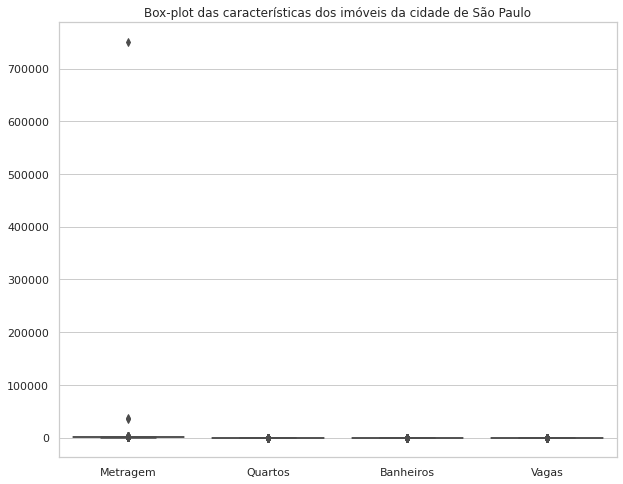

In [22]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 8))
plt.title("Box-plot das características dos imóveis da cidade de São Paulo")
box_plot_df_vista = sns.boxplot(data=df_vista[['Metragem', 'Quartos', 'Banheiros', 'Vagas']])
plt.show()

O gráfico de box plot apresentou todos os atributos, porém, como eles apresentam dimensões diferentes (quantidades, metragem, valor), os valores são pouco observáveis. Portanto, vamos avaliar separadamente.

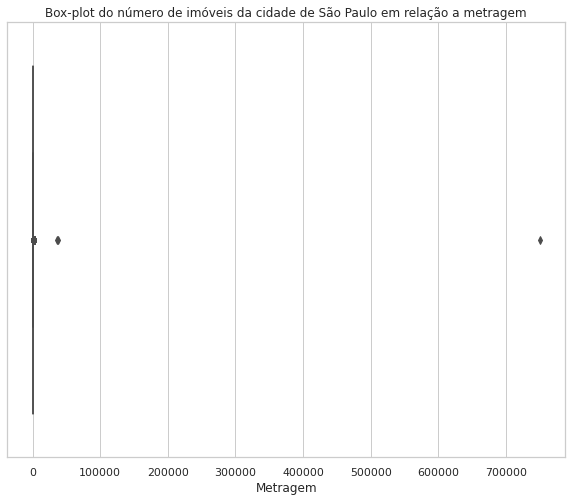

In [23]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 8))
plt.title("Box-plot do número de imóveis da cidade de São Paulo em relação a metragem")
box_plot_df_vista_metragem = sns.boxplot(x=df_vista['Metragem'])
plt.show()

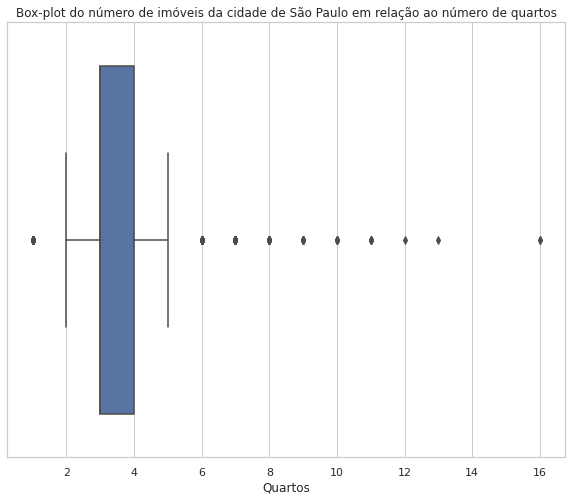

In [24]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 8))
plt.title("Box-plot do número de imóveis da cidade de São Paulo em relação ao número de quartos")
box_plot_df_vista_quartos = sns.boxplot(x=df_vista['Quartos'])
plt.show()

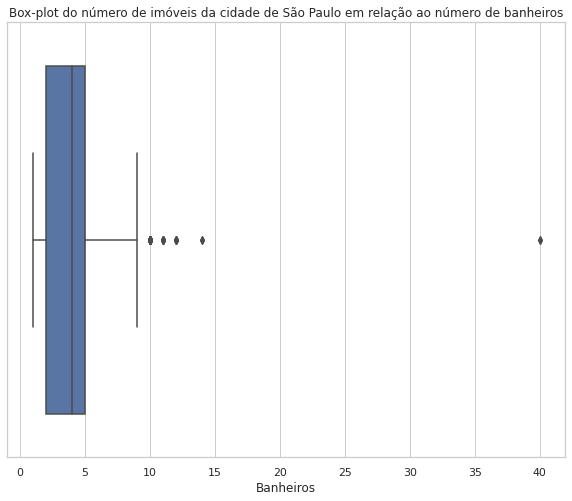

In [25]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 8))
plt.title("Box-plot do número de imóveis da cidade de São Paulo em relação ao número de banheiros")
box_plot_df_vista_banheiros = sns.boxplot(x=df_vista['Banheiros'])
plt.show()

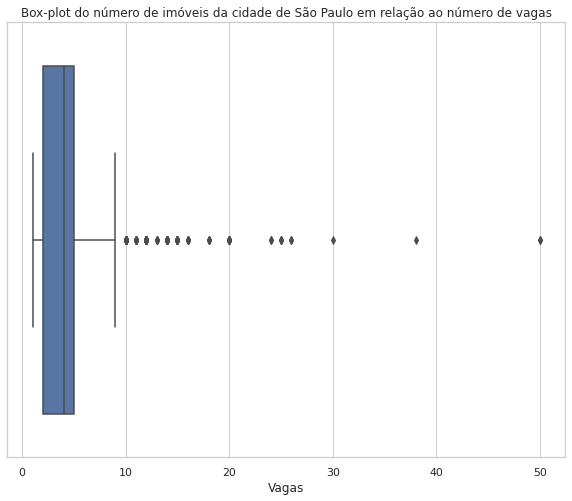

In [26]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 8))
plt.title("Box-plot do número de imóveis da cidade de São Paulo em relação ao número de vagas")
box_plot_df_vista_vagas = sns.boxplot(x=df_vista['Vagas'])
plt.show()

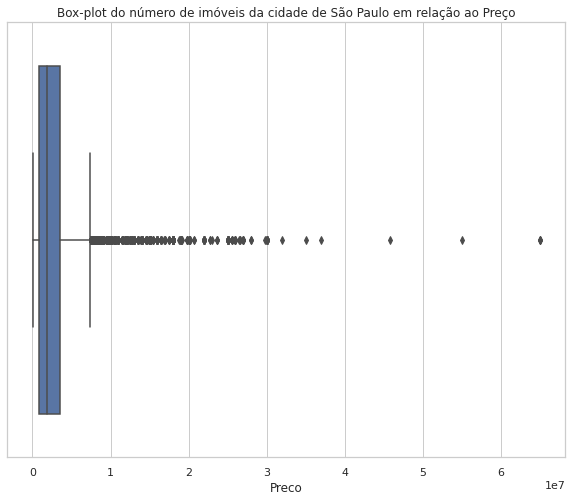

In [27]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 8))
plt.title("Box-plot do número de imóveis da cidade de São Paulo em relação ao Preço")
box_plot_df_vista_preco = sns.boxplot(x=df_vista['Preco'])
plt.show()

Avaliando todos os perfis, observou-se a presença de outliers em cada atributo. Vamos, portanto, realizar a etapa de eliminação de instâncias que apresentam tais valores discrepantes. Esses outliers interferem na aquisição de um possível modelo para predição.

In [28]:
df_vista.loc[df_vista['Metragem'] > 30000]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Preco,Pagamento
6600,Rua Benedito Felizardo,Sítio Represa,São Paulo,37000,4,2,4,2900000,Vista
6883,NaN,Jardim da Glória,São Paulo,35677,3,3,4,2550000,Vista
9845,Avenida George Saville Dodd,Jardim Guedala,São Paulo,750000,5,9,6,7000000,Vista


In [29]:
df_vista.loc[df_vista['Quartos'] == 16]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Preco,Pagamento
9711,"Rua Otávio Passos, 0",Vila Gomes,São Paulo,280,16,3,3,790000,Vista
9747,"Rua Otávio Passos, 0",Vila Gomes,São Paulo,285,16,3,3,790000,Vista


In [30]:
df_vista.loc[df_vista['Banheiros'] == 40]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Preco,Pagamento
2062,NaN,Jardim Guedala,São Paulo,488,4,40,4,2600000,Vista
2159,NaN,Jardim Guedala,São Paulo,493,4,40,4,2600000,Vista


In [31]:
df_vista.loc[df_vista['Preco'] > 40000000]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Preco,Pagamento
400,NaN,Jardim Europa,São Paulo,1510,5,5,20,65000000,Vista
1530,Praça Nicolau Scarpa,Jardim América,São Paulo,1200,4,4,25,65000000,Vista
3542,NaN,Jardim América,São Paulo,773,4,4,10,45825000,Vista
6131,Rua Estados Unidos,Jardim América,São Paulo,1816,4,10,20,55000000,Vista
6882,Rua Estados Unidos,Jardim América,São Paulo,1200,4,6,24,65000000,Vista


Com os índices localizados, podemos eliminá-los da lista de imóveis a vista.
Além disso, vamos criar uma nova coluna (Preço), porém com a escala em milhões. Para isso, podemos fazer uma nova coluna

In [32]:
df_vista_filtered = df_vista.drop([6600, 6883, 9845, 9711, 9747, 2062, 2159, 400, 1530, 3542, 6131, 6882])
df_vista_filtered['Preco (Milhoes)'] = df_vista_filtered['Preco']/1000000
df_vista_filtered

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Preco,Pagamento,Preco (Milhoes)
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000,Vista,7.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000,Vista,3.700
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000,Vista,0.380
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000,Vista,0.685
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000,Vista,0.540
...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,1500000,Vista,1.500
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,665000,Vista,0.665
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,2300000,Vista,2.300
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,1050000,Vista,1.050


Vamos analisar graficamente os atributos, com exceção do preço e metragem, para efeito de comparação.

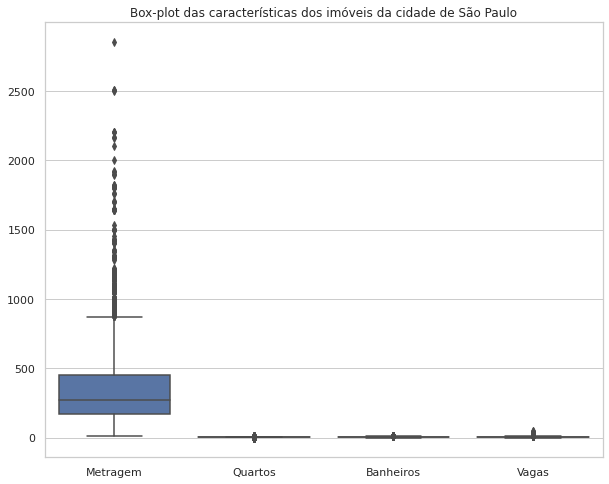

In [33]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 8))
plt.title("Box-plot das características dos imóveis da cidade de São Paulo")
box_plot_df_vista_filtered = sns.boxplot(data=df_vista_filtered[['Metragem', 'Quartos', 'Banheiros', 'Vagas']])
plt.show()

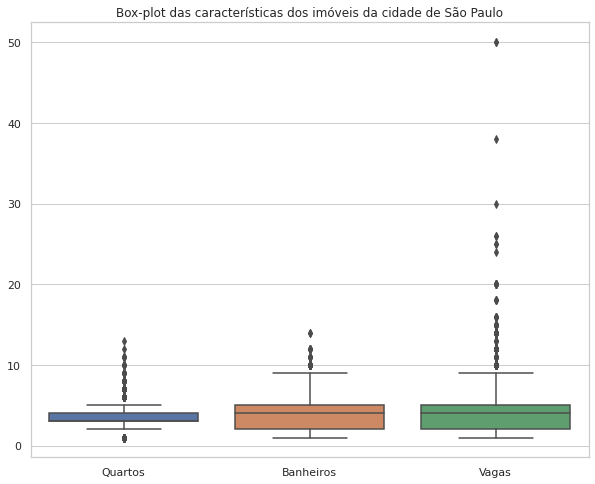

In [34]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 8))
plt.title("Box-plot das características dos imóveis da cidade de São Paulo")
box_plot_df_vista_filtered = sns.boxplot(data=df_vista_filtered[['Quartos', 'Banheiros', 'Vagas']])
plt.show()

Podemos avaliar graficamente a relação entre os atributos dos imóveis e avaliar possíveis correlações entre eles. 

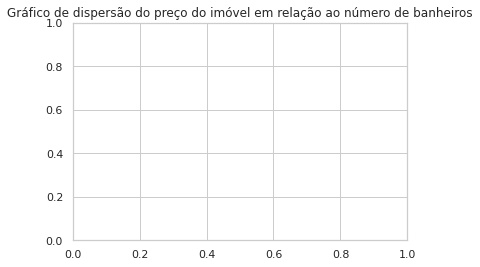

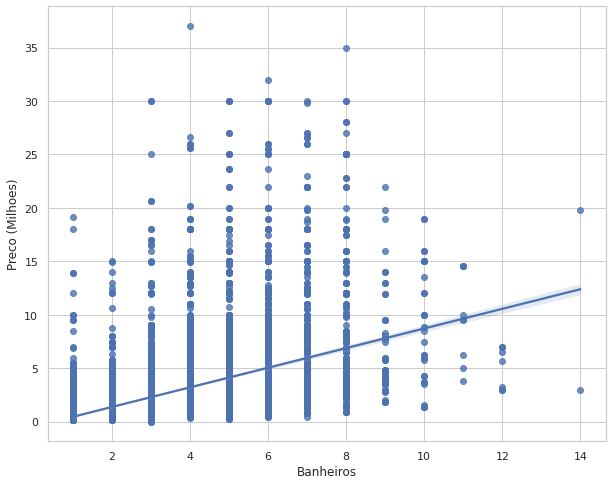

In [35]:
sns.set_theme(style="whitegrid")
plt.title("Gráfico de dispersão do preço do imóvel em relação ao número de banheiros")
plt.figure(figsize=(10, 8))
plot_banheiro_preco = sns.regplot(data=df_vista_filtered, x=df_vista_filtered["Banheiros"], y=df_vista_filtered["Preco (Milhoes)"])
plt.show()

Utilizando a função regplot, é possível gerar uma regressão linear nos valores obtidos. Observou-se uma tendência para o aumento no preço do imóvel com o aumento no número de banheiros. Podemos também fazer o mesmo gráfico, porém utilizando os valores médios de imóveis por número de banheiros.

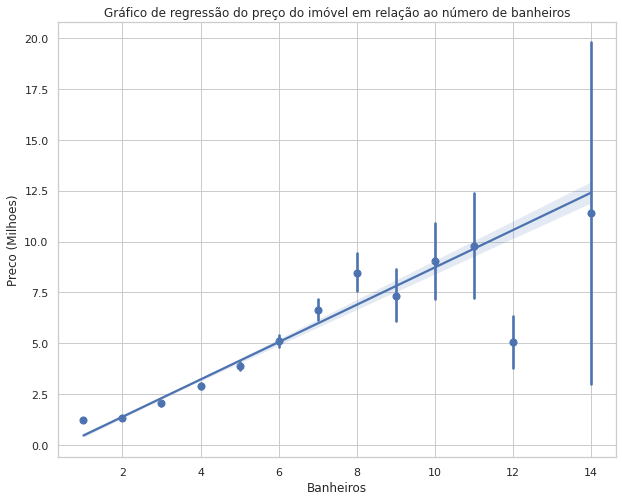

In [36]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 8))
plt.title("Gráfico de regressão do preço do imóvel em relação ao número de banheiros")
plot_banheiro_preco = sns.regplot(data=df_vista_filtered, x=df_vista_filtered["Banheiros"], y=df_vista_filtered["Preco (Milhoes)"], x_estimator=np.mean)
plt.show()

Com base nesse gráfico, observa-se que a medida que aumenta o número de imóveis, o preço dos imóveis tendem a dispersar mais. Vamos observar a relação entre a metragem, nº de quartos e vagas em relação ao preço.

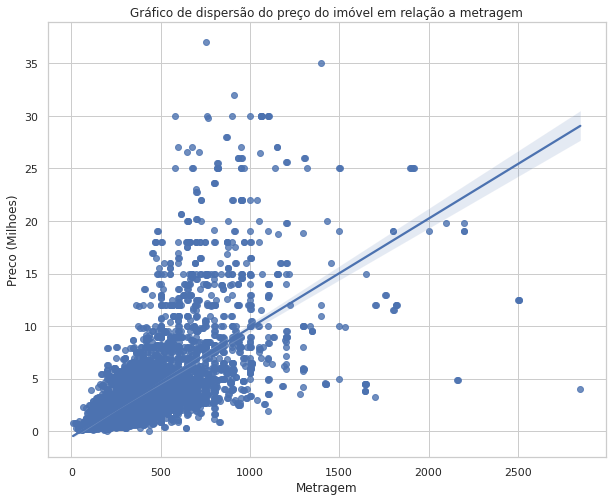

In [37]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 8))
plt.title("Gráfico de dispersão do preço do imóvel em relação a metragem")
plot_metragem_preco = sns.regplot(data=df_vista_filtered, x=df_vista_filtered["Metragem"], y=df_vista_filtered["Preco (Milhoes)"])
plt.show()

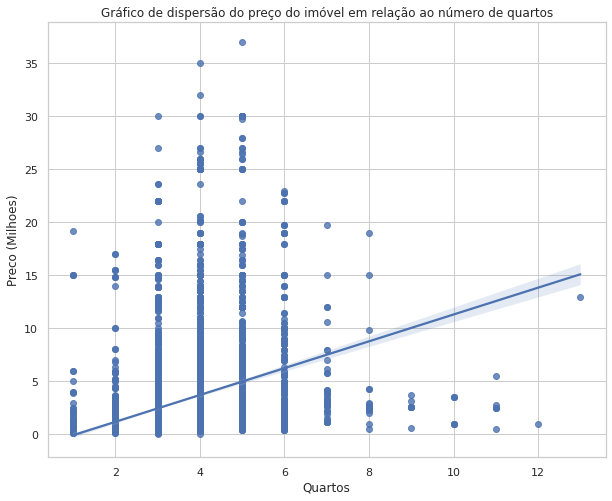

In [38]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 8))
plt.title("Gráfico de dispersão do preço do imóvel em relação ao número de quartos")
plot_quartos_preco = sns.regplot(data=df_vista_filtered, x=df_vista_filtered["Quartos"], y=df_vista_filtered["Preco (Milhoes)"])
plt.show()

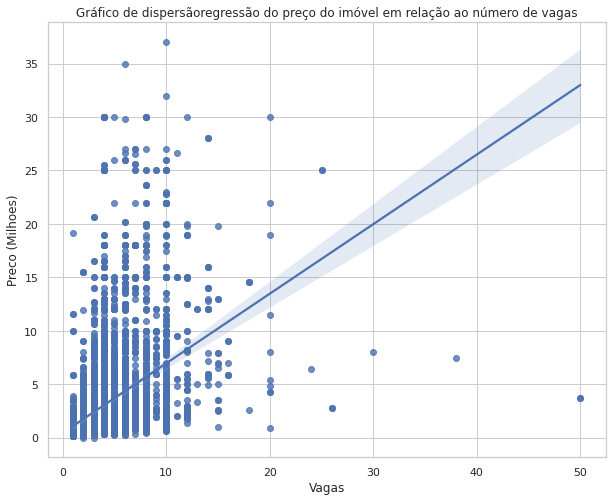

In [39]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 8))
plt.title("Gráfico de dispersãoregressão do preço do imóvel em relação ao número de vagas")
plot_vagas_preco = sns.regplot(data=df_vista_filtered, x=df_vista_filtered["Vagas"], y=df_vista_filtered["Preco (Milhoes)"])
plt.show()

Podemos observar que o aumento dos atributos tende a aumentar o preço do imóvel. O desafio portanto será construir um modelo que estime o preço do imóvel avaliando todos os atributos presentes em conjunto. Para isso, utilizaremos modelos de Machine Learning logo após a inclusão dos dados do IBGE com os dados tratados, pois poderemos incluir mais atributos para estimar melhor o preço do imóvel. Antes de incluirmos os dados do IBGE, vamos analisar os dados estatísticos por Bairro.

# Avaliação dos Preços dos Imóveis por Bairro na Cidade de São Paulo

Vamos primeiramente agrupar os imóveis por bairro. Para isso, utilizamos a função groupby e chamamos a função para realizar a estatística descritiva do preço dos imóveis. Aproveitando, vamos ordenar por contagem de imóveis por bairros para avaliarmos do maior número de imóveis por bairro para o menor.

In [40]:
bairros_imoveis_preco = df_vista_filtered['Bairro'].value_counts()
bairros_imoveis_preco

Alto de Pinheiros    369
Jardim Guedala       350
Jardim Paulista      266
Brooklin Paulista    224
Jardim Europa        209
                    ... 
Jardim Botucatu        1
Jardim Casablanca      1
Vila Aricanduva        1
Vila Jurema            1
Cidade Centenário      1
Name: Bairro, Length: 696, dtype: int64

Ordenando por quantidade de imóveis, observou-se que existem bairros que apresentam mais de 100 imóveis, enquanto que há outros que apresentam apenas 1. Em termos de avaliação estatística, recomenda-se que trabalhemos com numeros de amostras (nº de imóveis) significativos a porto de termos uma análise descritiva mais robusta. Com basse nisso, vamos avaliar os 20 bairros com os maiores números de imóveis catalogados e seus preços. Para isso, agrupamos os resultados chamando a função groupby e definindo-o como um DataFrame.

In [41]:
top_bairros_preco = pd.DataFrame(df_vista_filtered.groupby(['Bairro'])["Preco"].describe().round(2).sort_values(by='count', ascending = False, inplace=False)) #Agrupa os dados e nos trás informação de metragem por bairro.
top_bairros_preco

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Alto de Pinheiros,369.0,4782698.96,2410184.47,1180000.0,3300000.0,4100000.0,5500000.0,18000000.0
Jardim Guedala,350.0,5111330.25,2971775.55,1450000.0,3185000.0,4200000.0,6000000.0,18000000.0
Jardim Paulista,266.0,8030379.70,5863611.01,1600000.0,3822500.0,6000000.0,10750000.0,30000000.0
Brooklin Paulista,224.0,2124092.81,968008.19,545000.0,1500000.0,1850000.0,2500000.0,5500000.0
Jardim Europa,209.0,11240061.72,6755059.68,13000.0,5500000.0,9500000.0,15500000.0,37000000.0
...,...,...,...,...,...,...,...,...
Jardim Avenida,1.0,328000.00,NaN,328000.0,328000.0,328000.0,328000.0,328000.0
Vila Euthalia,1.0,350000.00,NaN,350000.0,350000.0,350000.0,350000.0,350000.0
Vila Fernandes,1.0,450000.00,NaN,450000.0,450000.0,450000.0,450000.0,450000.0


Podemos avaliar apenas os vinte primeiros bairros da lista. Observou-se que bairros contendo apenas 1 imóvel não apresenta valores estatísticos relevantes. A média seria o próprio valor do imóvel único, enquanto que o min, o max e a mediana dos valores são os mesmos. 

Vamos também fazer um histograma para observar a distribuição de metragem por bairro. Para isso vamos escrever o código abaixo.

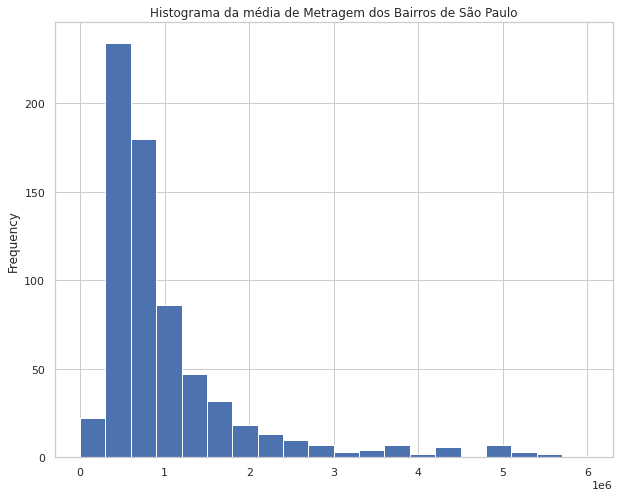

In [42]:
plt.show()
top_bairros_preco['mean'].plot.hist(by=top_bairros_preco['mean'], xlabel='Metragem (m²)', ylabel='Nº de Imoveis', range=(1, 6000000), bins=20, figsize=(10,8), title='Histograma da média de Metragem dos Bairros de São Paulo')
plt.show()

Vamos, portanto, avaliar apenas os 20 bairros com maior número de contagem.

In [43]:
top_20bairros_preco = top_bairros_preco[:20].sort_values(by='mean', ascending=False)
top_20bairros_preco

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Jardim América,115.0,14991817.39,8086619.73,2300000.0,8100000.0,14000000.0,22800000.0,30000000.0
Jardim Europa,209.0,11240061.72,6755059.68,13000.0,5500000.0,9500000.0,15500000.0,37000000.0
Jardim Paulista,266.0,8030379.70,5863611.01,1600000.0,3822500.0,6000000.0,10750000.0,30000000.0
Cidade Jardim,191.0,6095345.03,4386339.68,1378000.0,3750000.0,4800000.0,6000000.0,26500000.0
Jardim Paulistano,134.0,5728134.34,3393878.42,1800000.0,3220000.0,5025000.0,7000000.0,15000000.0
Jardim Guedala,350.0,5111330.25,2971775.55,1450000.0,3185000.0,4200000.0,6000000.0,18000000.0
Alto de Pinheiros,369.0,4782698.96,2410184.47,1180000.0,3300000.0,4100000.0,5500000.0,18000000.0
Pacaembu,200.0,4339782.50,3242252.99,800000.0,2497500.0,3000000.0,4525000.0,18720000.0
Jardim Leonor,170.0,3801919.82,2383838.14,1100000.0,2350000.0,3500000.0,4787500.0,22000000.0


In [44]:
top_20bairros_preco.head()

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Jardim América,115.0,14991817.39,8086619.73,2300000.0,8100000.0,14000000.0,22800000.0,30000000.0
Jardim Europa,209.0,11240061.72,6755059.68,13000.0,5500000.0,9500000.0,15500000.0,37000000.0
Jardim Paulista,266.0,8030379.70,5863611.01,1600000.0,3822500.0,6000000.0,10750000.0,30000000.0
Cidade Jardim,191.0,6095345.03,4386339.68,1378000.0,3750000.0,4800000.0,6000000.0,26500000.0
Jardim Paulistano,134.0,5728134.34,3393878.42,1800000.0,3220000.0,5025000.0,7000000.0,15000000.0


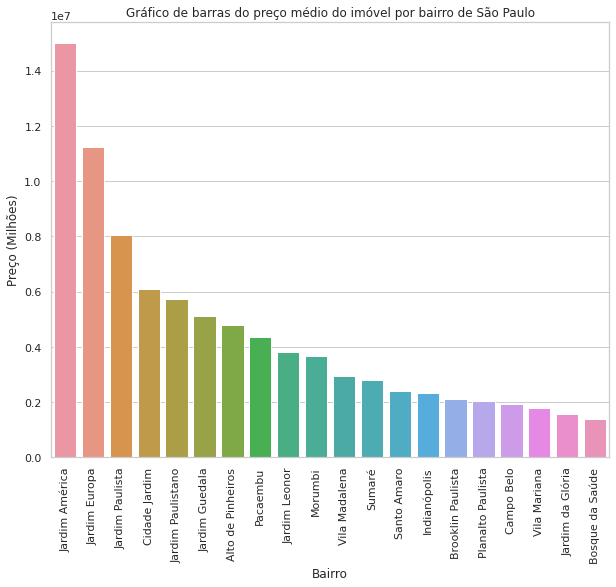

In [45]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 8))
plt.title("Gráfico de barras do preço médio do imóvel por bairro de São Paulo")
plt.xticks(rotation=90)
plot_top_10bairros_preco = sns.barplot(data=top_20bairros_preco, x=top_20bairros_preco.index, y=top_20bairros_preco['mean']).set(ylabel="Preço (Milhões)")
plt.show()

O preço médio por bairro varia bastante considerando os 20 bairros mencionados. O valor médio no jardim américa é o maior dos 20, enquanto que o Bosque da Saúde apresenta o menor valor médio. Realizamos também o gráfico de box-plot dos bairros para avaliar o grau de dispersão dos valores dos imóveis. Para isso, escrevemos o código abaixo 

In [46]:
top_20bairros_preco_index = top_20bairros_preco.index
top_20bairros_preco_index

Index(['Jardim América', 'Jardim Europa', 'Jardim Paulista', 'Cidade Jardim',
       'Jardim Paulistano', 'Jardim Guedala', 'Alto de Pinheiros', 'Pacaembu',
       'Jardim Leonor', 'Morumbi', 'Vila Madalena', 'Sumaré', 'Santo Amaro',
       'Indianópolis', 'Brooklin Paulista', 'Planalto Paulista', 'Campo Belo',
       'Vila Mariana', 'Jardim da Glória', 'Bosque da Saúde'],
      dtype='object', name='Bairro')

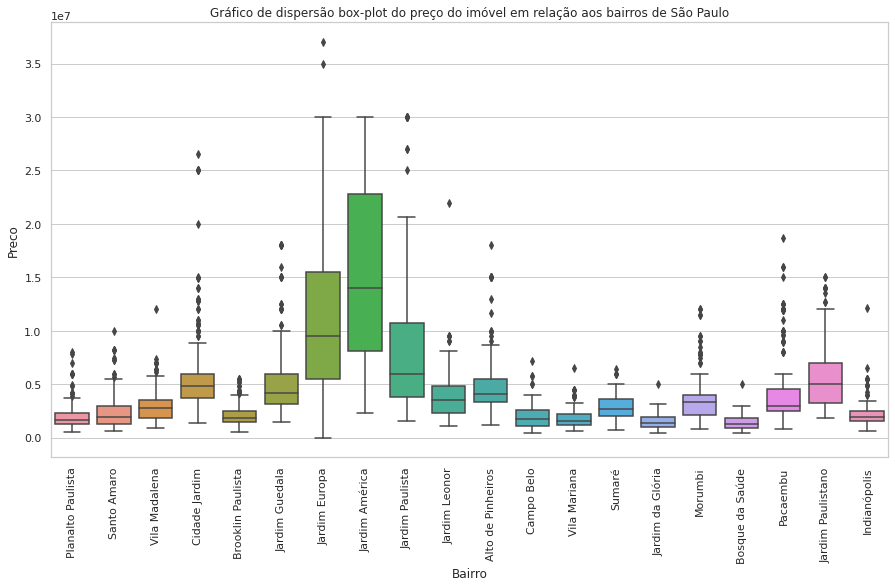

In [47]:
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
plt.title("Gráfico de dispersão box-plot do preço do imóvel em relação aos bairros de São Paulo")
boxplot_top_10bairros_preco = sns.boxplot(data=df_vista_filtered.query('Bairro in @top_20bairros_preco_index'), x="Bairro", y='Preco')
plt.show()

Com base no gráfico, observou-se que existem bairros com variações nos preços maiores que em outros. Diversos fatores podem influenciar essa variação: como localidade ou grande variação nas características dos imóveis. Mais dados seriam necessários para avaliar o que motiva a variação nos preços dos imóveis. Para isso, vamos vincular os dados do IBGE aos dados até então. No entanto, precisaremos realizar mais um tratamento nos dados: remover imóveis que não apresentam a rua. Para isso, vamos identificá-los

In [48]:
rua_semnome = df_vista_filtered['Rua'].isna()
rua_semnome.sum()

3044

Existem 3044 imóveis sem nome de rua. Vamos identificar por bairro.

In [49]:
bairro_sem_nome = df_vista_filtered.groupby(['Bairro'])['Rua'].apply(lambda x: x.isnull().sum())
bairro_sem_nome.sum()

3044

In [50]:
bairro_sem_nome = bairro_sem_nome.head(20).sort_values(ascending=False)
bairro_sem_nome.head(20)

Bairro
Alto de Pinheiros            151
Brooklin Paulista             66
Bosque da Saúde               54
Boaçava                       46
Alto da Lapa                  25
Belenzinho                     7
Alto da Mooca                  5
Brasilândia                    4
Bela Aliança                   3
Aclimação                      2
Barra Funda                    2
Alto da Boa Vista              1
Aricanduva                     1
Brooklin                       1
Brooklin Novo                  1
Barro Branco (Zona Norte)      0
Bom Retiro                     0
Bortolândia                    0
Balneário Mar Paulista         0
Bela Vista                     0
Name: Rua, dtype: int64

O alto de pinheiros é o bairro que mais apresenta imóveis sem endereço, seguindo do Brooklin Paulista, Bosque da Saúde e Boaçava. Podemos realizar mais um filtro nos imóveis vendidos a vista pela função query. Diante disso, poderemos finalmente eliminar dados faltantes. Para isso, usamos a função .dropna

In [51]:
df_vista_filtered_endereco = df_vista_filtered.dropna()
df_vista_filtered_endereco

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Preco,Pagamento,Preco (Milhoes)
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000,Vista,7.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000,Vista,3.700
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000,Vista,0.380
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000,Vista,0.540
5,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,1980000,Vista,1.980
...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,1500000,Vista,1.500
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,665000,Vista,0.665
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,2300000,Vista,2.300
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,1050000,Vista,1.050


Existiam 9144 imóveis catalogados em nossos dados. Após eliminar os dados faltantes, o número de imóveis foi para 6090. Com os dados tratados, vinculamos a tabela dos os dados do IBGE.

# Integração dos dados do IBGE aos dados dos imóveis de São Paulo.

Após realizar o processo de data cleaning dos dados dos imóveis que estão a venda e que contém todas as informações disponíveis, vamos realizar o processo de inclusão dos dados do IBGE. Iremos importar os dados.

In [52]:
import pandas as pd
ibge_sp = pd.read_csv(
    'https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv',
    encoding='ISO-8859-1',
    sep=';', thousands='.', decimal=','
)
ibge_sp.dropna(how='all', axis=1, inplace=True)
ibge_sp.head()

,Cod_setor,Cod_Grandes Regiï¿½es,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,355030801000001,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.01,2.32,2091.32,8532451.78,2164.55,8673276.78,1227.41,4285771.99,1713.75,5152087.86
1,355030801000002,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,2.98,2.09,1650.09,3983441.31,1717.44,4030519.99,1045.78,2572133.32,1468.08,2991546.94
2,355030801000003,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.31,3.08,1280.43,5474593.06,2349.53,7553913.02,902.97,2735492.52,1786.79,3837674.74
3,355030801000004,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.16,2.26,1119.59,3572955.10,1859.13,4567289.50,869.09,2122409.02,1567.41,2735383.24
4,355030801000005,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.14,2.35,1416.90,2240207.58,1581.66,2240109.39,917.71,1570047.75,1356.35,1725877.85


Observou-se a presença de colunas codificadas. Para maiores informações, o site do IBGE disponibiliza um manual contendo as informações presentes na tabela acima. [Clique aqui](https://www.ipea.gov.br/redeipea/images/pdfs/base_de_informacoess_por_setor_censitario_universo_censo_2010.pdf) para mais informações.

Com os dados obtidos, vamos obter as informações de cada coluna pela função info()

In [53]:
ibge_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18363 entries, 0 to 18362
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Cod_setor              18363 non-null  int64  
 1   Cod_Grandes Regiï¿½es  18363 non-null  int64  
 2   Nome_Grande_Regiao     18363 non-null  object 
 3   Cod_UF                 18363 non-null  int64  
 4   Nome_da_UF             18363 non-null  object 
 5   Cod_meso               18363 non-null  int64  
 6   Nome_da_meso           18363 non-null  object 
 7   Cod_micro              18363 non-null  int64  
 8   Nome_da_micro          18363 non-null  object 
 9   Cod_RM                 18363 non-null  int64  
 10  Nome_da_RM             18363 non-null  object 
 11  Cod_municipio          18363 non-null  int64  
 12  Nome_do_municipio      18363 non-null  object 
 13  Cod_distrito           18363 non-null  int64  
 14  Nome_do_distrito       18363 non-null  object 
 15  Co

Existem informações categóricas e informações quantitativas das atribuições contidas no imóvel. Agora, na próxima etapa, realizamos um procedimento para vincular as duas tabelas. Para isso, devemos encontrar uma atribuição em comum nas duas tabelas. Essa informação é o endereço do imóvel. No entanto, é muito difícil vincular dados por objeto. Será mais fácil atribuir o nome da rua a um valor numérico (latitude, longitude) e, a partir daí, associar as duas tabelas. 

Para isso, vamos importar as latitudes e longitudes das ruas e avenidas da cidade de São Paulo.

In [54]:
enderecos = pd.read_csv("/content/drive/MyDrive/Alura_Imersaodados_2022/enderecos.csv")
enderecos

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude
0,Rua,Armando Silveira,Rua Armando Silveira,NaN,Divisa,Santana do Livramento,RS,97573200.0,-30.882674,-55.548830
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.0,-21.190276,-50.448686
2,Rua,Prefeito Agenor Barcelos Feio,Rua Prefeito Agenor Barcelos Feio,NaN,Registro,Santana do Livramento,RS,97571090.0,-30.855721,-55.555757
3,Rua,Sebastião Gomes,Rua Sebastião Gomes - até 59/60,59,Registro,Santana do Livramento,RS,97571374.0,-30.863149,-55.552083
4,Rua,Marquês do Alegrete,Rua Marquês do Alegrete,NaN,Parque das Águas,Santana do Livramento,RS,97571500.0,-30.864415,-55.545860
...,...,...,...,...,...,...,...,...,...,...
1113881,Quadra,4 Conjunto 7,Quadra 4 Conjunto 7,NaN,Setor Habitacional Vicente Pires - Trecho 3,Brasília,DF,72001381.0,-15.703283,-47.869236
1113882,Rodovia,Mario Tonolli,Rodovia Mario Tonolli,NaN,Morro Alto,Itupeva,SP,13297002.0,-23.186604,-47.078942
1113883,Avenida,das Torres,Avenida das Torres - de 6318 ao fim - lado par,6318,Lago Azul,Manaus,AM,69018156.0,-2.986641,-59.992092
1113884,Rua,Tiradentes,Rua Tiradentes - de 181 a 369 - lado ímpar,181,Vila Queiroz,Artur Nogueira,SP,13163000.0,-22.577444,-47.168819


Filtramos agora ruas presentes ainda no estado de São Paulo. 

In [55]:
enderecos_sp = enderecos.query("sigla_uf == 'SP'")
enderecos_sp

,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.0,-21.190276,-50.448686
413269,Rua,A,Rua A,NaN,Jardim Glória,Americana,SP,13468220.0,-22.756531,-47.343738
413270,Rua,A,Rua A,NaN,Jardim São Roque,Americana,SP,13469414.0,-22.743734,-47.348631
413271,Rua,A,Rua A,NaN,Iate Clube de Campinas,Americana,SP,13475620.0,-22.737846,-47.333569
413272,Rua,João Bandini,Rua João Bandini,NaN,Jardim Miriam,Americana,SP,13469072.0,-22.744283,-47.351588
...,...,...,...,...,...,...,...,...,...,...
1113858,Rua,Daniel Buccieri,Rua Daniel Buccieri,NaN,Jardim Alvorada,Monte Mor,SP,13198524.0,-22.926185,-47.265163
1113865,Rua,Ottorino Rizzi,Rua Ottorino Rizzi,NaN,Royal Park,Ribeirão Preto,SP,14028563.0,-21.241158,-47.830249
1113873,Rua,Adriano Michelutti Cândia,Rua Adriano Michelutti Cândia,NaN,Jardim San Marco II,Ribeirão Preto,SP,14035198.0,-21.200525,-47.741982
1113882,Rodovia,Mario Tonolli,Rodovia Mario Tonolli,NaN,Morro Alto,Itupeva,SP,13297002.0,-23.186604,-47.078942


Vale observar que o tipo logradouro e o tipo de nome estão separados. Portanto, unificamos-os para identificar melhor o endereço. Para evitar conflito na identificação, colocamos todas as letras em formato minúsculo e eliminamos espaço desnecessário.

In [56]:
enderecos_sp["rua"] = enderecos_sp["tipo_logr"] + " " + enderecos_sp["logr_nome"]
enderecos_sp["rua"] = enderecos_sp["rua"].str.lower().str.strip()
enderecos_sp.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude,rua
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.0,-21.190276,-50.448686,rua joão antônio vasconcelos
413269,Rua,A,Rua A,NaN,Jardim Glória,Americana,SP,13468220.0,-22.756531,-47.343738,rua a
413270,Rua,A,Rua A,NaN,Jardim São Roque,Americana,SP,13469414.0,-22.743734,-47.348631,rua a
413271,Rua,A,Rua A,NaN,Iate Clube de Campinas,Americana,SP,13475620.0,-22.737846,-47.333569,rua a
413272,Rua,João Bandini,Rua João Bandini,NaN,Jardim Miriam,Americana,SP,13469072.0,-22.744283,-47.351588,rua joão bandini


Em seguida, formatamos as ruas da tabela de venda dos imóveis para coincidir com os dados do IBGE. Para isso, escrevemos o código abaixo para eliminar o número do imóvel.

In [57]:
df_vista_filtered_endereco["Rua"].str.extract(r'(^[\w ]+)')[:10]

,0
0,Avenida Itacira
1,Rua Aurelia Perez Alvarez
2,Rua Alba Valdez
4,Rua Tobias Barreto
5,Rua Graham Bell
6,Rua Francisco Paulo
7,Rua Guilherme Valente
8,Rua Sagrada Família
9,Rua Tapaji
10,Rua Vigário João Álvares


Agora tornamos tudo em minúsculo

In [58]:
df_vista_filtered_endereco["apenas_rua"] = df_vista_filtered_endereco["Rua"].str.extract(r'(^[\w ]+)')
df_vista_filtered_endereco["apenas_rua"] = df_vista_filtered_endereco["apenas_rua"].str.lower().str.strip()
df_vista_filtered_endereco.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Preco,Pagamento,Preco (Milhoes),apenas_rua
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000,Vista,7.00,avenida itacira
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000,Vista,3.70,rua aurelia perez alvarez
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000,Vista,0.38,rua alba valdez
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000,Vista,0.54,rua tobias barreto
5,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,1980000,Vista,1.98,rua graham bell


Finalmente, poderemos unificar as tabelas de vendas com as tabelas de latitude e longitude, eliminando duplicatas e agrupando por CEP.

In [59]:
dados_geo = pd.merge(left = df_vista_filtered_endereco, right = enderecos_sp[["rua", "cep", "latitude", "longitude"]], how = "left", left_on = "apenas_rua", right_on = "rua").drop_duplicates(subset=df_vista_filtered_endereco.columns).query("cep > 0")
dados_geo

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Preco,Pagamento,Preco (Milhoes),apenas_rua,rua,cep,latitude,longitude
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000,Vista,7.000,avenida itacira,avenida itacira,11443160.0,-23.975993,-46.201317
5,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000,Vista,3.700,rua aurelia perez alvarez,rua aurelia perez alvarez,4642020.0,-23.640961,-46.688311
6,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000,Vista,0.380,rua alba valdez,rua alba valdez,4845200.0,-23.752990,-46.695889
7,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000,Vista,0.540,rua tobias barreto,rua tobias barreto,13474663.0,-22.698901,-47.294461
20,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,1980000,Vista,1.980,rua graham bell,rua graham bell,4737030.0,-23.593796,-46.760077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31955,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,1500000,Vista,1.500,avenida odila,avenida odila,4058020.0,-23.609093,-46.647258
31957,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,665000,Vista,0.665,rua tapuçu,rua tapuçu,4671185.0,-23.661018,-46.691521
31958,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,2300000,Vista,2.300,rua guararema,rua guararema,13030640.0,-22.922749,-47.076960
31975,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,1050000,Vista,1.050,rua estero belaco,rua estero belaco,4145020.0,-23.616124,-46.632983


Podemos agora importar bibliotecas que conseguem identificar as ruas a partir da latitude e longitude presente na tabela. Para isso, vamos chamar as bibliotecas abaixo.

In [60]:
!pip install geopandas
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import Polygon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Com as bibliotecas devidamente convocadas, podemos importar os dados obtidos dos setores censitários da cidade de São Paulo pelo IBGE ([Link do banco de dados](https://www.ibge.gov.br/geociencias/downloads-geociencias.html)) contendo as informações do último censo (2010). Esses dados são importantes para vincular os dados de venda com os dados do IBGE dos imóveis.

In [61]:
setor_censo = gpd.read_file('/content/drive/MyDrive/Alura_Imersaodados_2022/sp_setores_censitarios/35SEE250GC_SIR.shp')
setor_censo

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry
0,98237.0,354100005000009,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,1,"POLYGON ((-46.41024 -24.01103, -46.41169 -24.0..."
1,98232.0,354100005000004,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,2,"POLYGON ((-46.41606 -24.00245, -46.41598 -24.0..."
2,98230.0,354100005000002,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,3,"POLYGON ((-46.41213 -24.00792, -46.41244 -24.0..."
3,98229.0,354100005000001,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,4,"POLYGON ((-46.41134 -24.00552, -46.41196 -24.0..."
4,98231.0,354100005000003,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,5,"POLYGON ((-46.41326 -24.00514, -46.41484 -24.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68291,133873.0,355730305000008,URBANO,35573030500,None,355730305,ESTIVA GERBI,3557303,ESTIVA GERBI,MOJI-MIRIM,CAMPINAS,None,None,68292,"POLYGON ((-46.95301 -22.28885, -46.95401 -22.2..."
68292,133874.0,355730305000009,URBANO,35573030500,None,355730305,ESTIVA GERBI,3557303,ESTIVA GERBI,MOJI-MIRIM,CAMPINAS,None,None,68293,"POLYGON ((-46.97846 -22.22911, -46.97545 -22.2..."
68293,133875.0,355730305000010,URBANO,35573030500,None,355730305,ESTIVA GERBI,3557303,ESTIVA GERBI,MOJI-MIRIM,CAMPINAS,None,None,68294,"POLYGON ((-46.97514 -22.26519, -46.97416 -22.2..."
68294,133876.0,355730305000011,RURAL,35573030500,None,355730305,ESTIVA GERBI,3557303,ESTIVA GERBI,MOJI-MIRIM,CAMPINAS,None,None,68295,"POLYGON ((-46.94954 -22.26701, -46.94888 -22.2..."


In [62]:
setor_censo_sp = setor_censo[setor_censo.NM_MUNICIP == "SÃO PAULO"] #Vamos selecionar apenas os setores da cidade de são paulo
setor_censo_sp 

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry
42322,109347.0,355030804000079,URBANO,35503080400,None,355030804,ARICANDUVA,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,42323,"POLYGON ((-46.51778 -23.57947, -46.51786 -23.5..."
42323,109348.0,355030804000080,URBANO,35503080400,None,355030804,ARICANDUVA,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,42324,"POLYGON ((-46.51888 -23.57967, -46.51908 -23.5..."
42324,109349.0,355030804000081,URBANO,35503080400,None,355030804,ARICANDUVA,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,42325,"POLYGON ((-46.52015 -23.58105, -46.52026 -23.5..."
42325,109350.0,355030804000082,URBANO,35503080400,None,355030804,ARICANDUVA,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,42326,"POLYGON ((-46.52140 -23.57992, -46.52144 -23.5..."
42326,109351.0,355030804000083,URBANO,35503080400,None,355030804,ARICANDUVA,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,42327,"POLYGON ((-46.52371 -23.58185, -46.52384 -23.5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62380,127887.0,355030896000243,URBANO,35503089600,None,355030896,LAJEADO,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,62381,"POLYGON ((-46.38853 -23.54385, -46.38852 -23.5..."
62381,127888.0,355030896000244,URBANO,35503089600,None,355030896,LAJEADO,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,62382,"POLYGON ((-46.38810 -23.54514, -46.38810 -23.5..."
62382,127889.0,355030896000245,URBANO,35503089600,None,355030896,LAJEADO,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,62383,"POLYGON ((-46.42363 -23.52079, -46.42341 -23.5..."
62383,127890.0,355030896000246,URBANO,35503089600,None,355030896,LAJEADO,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,62384,"POLYGON ((-46.42242 -23.52122, -46.42209 -23.5..."


Agora podemos incluir os setores na tabela dados_geo (Contendo os dados de venda dos imóveis e a geolocalização)

In [63]:
dados_geo["Point"] = ""
for i in dados_geo.index:
    dados_geo["Point"][i] = Point(dados_geo["longitude"][i], dados_geo["latitude"][i])

dados_geo['setor_censo'] = dados_geo["Point"].map(
    lambda x: setor_censo_sp.loc[setor_censo_sp.contains(x), 'CD_GEOCODI'].values
).str[0]
dados_geo.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Preco,Pagamento,Preco (Milhoes),apenas_rua,rua,cep,latitude,longitude,Point,setor_censo
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000,Vista,7.00,avenida itacira,avenida itacira,11443160.0,-23.975993,-46.201317,POINT (-46.2013172 -23.975993),NaN
5,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000,Vista,3.70,rua aurelia perez alvarez,rua aurelia perez alvarez,4642020.0,-23.640961,-46.688311,POINT (-46.6883114 -23.6409612),355030871000023
6,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000,Vista,0.38,rua alba valdez,rua alba valdez,4845200.0,-23.752990,-46.695889,POINT (-46.6958895 -23.75299),355030830000050
7,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000,Vista,0.54,rua tobias barreto,rua tobias barreto,13474663.0,-22.698901,-47.294461,POINT (-47.2944609 -22.6989009),NaN
20,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,1980000,Vista,1.98,rua graham bell,rua graham bell,4737030.0,-23.593796,-46.760077,POINT (-46.7600773 -23.5937964),355030865000169


In [64]:
dados_geo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5624 entries, 0 to 31976
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rua              5624 non-null   object 
 1   Bairro           5624 non-null   object 
 2   Cidade           5624 non-null   object 
 3   Metragem         5624 non-null   int64  
 4   Quartos          5624 non-null   int64  
 5   Banheiros        5624 non-null   int64  
 6   Vagas            5624 non-null   int64  
 7   Preco            5624 non-null   int64  
 8   Pagamento        5624 non-null   object 
 9   Preco (Milhoes)  5624 non-null   float64
 10  apenas_rua       5624 non-null   object 
 11  rua              5624 non-null   object 
 12  cep              5624 non-null   float64
 13  latitude         5624 non-null   float64
 14  longitude        5624 non-null   float64
 15  Point            5624 non-null   object 
 16  setor_censo      3889 non-null   object 
dtypes: float64(4)

Os dados em "setor_censo" estão em forma de objeto. Acredita-se que essa atribuição está vinculada a dados faltantes. Para sanar esta problemática, filtramos alguns dados desta coluna.

In [65]:
dados_geo_filtered = dados_geo
dados_geo_filtered

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Preco,Pagamento,Preco (Milhoes),apenas_rua,rua,cep,latitude,longitude,Point,setor_censo
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000,Vista,7.000,avenida itacira,avenida itacira,11443160.0,-23.975993,-46.201317,POINT (-46.2013172 -23.975993),NaN
5,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000,Vista,3.700,rua aurelia perez alvarez,rua aurelia perez alvarez,4642020.0,-23.640961,-46.688311,POINT (-46.6883114 -23.6409612),355030871000023
6,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000,Vista,0.380,rua alba valdez,rua alba valdez,4845200.0,-23.752990,-46.695889,POINT (-46.6958895 -23.75299),355030830000050
7,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000,Vista,0.540,rua tobias barreto,rua tobias barreto,13474663.0,-22.698901,-47.294461,POINT (-47.2944609 -22.6989009),NaN
20,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,1980000,Vista,1.980,rua graham bell,rua graham bell,4737030.0,-23.593796,-46.760077,POINT (-46.7600773 -23.5937964),355030865000169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31955,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,1500000,Vista,1.500,avenida odila,avenida odila,4058020.0,-23.609093,-46.647258,POINT (-46.6472577 -23.6090928),355030877000099
31957,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,665000,Vista,0.665,rua tapuçu,rua tapuçu,4671185.0,-23.661018,-46.691521,POINT (-46.6915206 -23.661018),355030816000087
31958,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,2300000,Vista,2.300,rua guararema,rua guararema,13030640.0,-22.922749,-47.076960,POINT (-47.0769595 -22.9227492),NaN
31975,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,1050000,Vista,1.050,rua estero belaco,rua estero belaco,4145020.0,-23.616124,-46.632983,POINT (-46.632983 -23.6161237),355030877000052


In [66]:
dados_geo_filtered.setor_censo = pd.to_numeric(dados_geo_filtered['setor_censo'])


Desta forma, conseguimos vincular os dados dos imóveis com os dados do IBGE.

In [67]:
dados_vendas_censo = pd.merge(left = dados_geo_filtered, right = ibge_sp, how = "left", left_on = "setor_censo", right_on = "Cod_setor")

dados_vendas_censo

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Preco,Pagamento,Preco (Milhoes),...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000,Vista,7.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000,Vista,3.700,...,3.13,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000,Vista,0.380,...,3.47,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000,Vista,0.540,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,1980000,Vista,1.980,...,3.51,2.31,1026.36,272168.67,1143.96,167733.64,735.67,367088.08,1086.94,159622.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5619,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,1500000,Vista,1.500,...,2.81,1.60,4249.33,24499871.44,5180.14,25047413.33,2618.76,17705032.31,3977.93,21495997.85
5620,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,665000,Vista,0.665,...,2.99,1.81,2425.09,6878872.25,2543.80,6913867.79,1561.58,4261814.01,2062.09,4596759.57
5621,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,2300000,Vista,2.300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5622,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,1050000,Vista,1.050,...,2.75,1.50,5650.20,20344622.14,5750.84,20127679.27,3459.68,16021825.60,4362.79,16264378.33


A tabela apresenta dados faltantes. existem duas opções: eliminar as linhas contendo dados faltantes ou utilizar métodos de preenchimento com base em alguns critérios. Vamos primeiro avaliar o número de linhas com dados faltantes e avaliar quantos imóveis ainda temos.

In [68]:
dados_vendas_censo_filtered = dados_vendas_censo.dropna(inplace=False)
dados_vendas_censo_filtered

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Preco,Pagamento,Preco (Milhoes),...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000,Vista,3.700,...,3.13,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000,Vista,0.380,...,3.47,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,1980000,Vista,1.980,...,3.51,2.31,1026.36,272168.67,1143.96,167733.64,735.67,367088.08,1086.94,159622.46
5,"Rua Francisco Paulo, 31",Cidade Mãe do Céu,São Paulo,145,4,4,2,850000,Vista,0.850,...,2.95,2.18,1580.84,4440789.58,1897.01,4730743.23,1284.45,2578384.56,1743.39,2699812.75
6,"Rua Guilherme Valente, 150",Jardim Vergueiro,São Paulo,150,2,2,2,450000,Vista,0.450,...,3.23,2.13,1613.93,33332390.49,1721.15,35369361.97,880.61,12700171.03,1333.63,18640212.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5618,Rua Pedro Teixeira,Vila Olímpia,São Paulo,157,3,2,2,960000,Vista,0.960,...,2.17,1.27,5054.58,33245189.73,5231.93,33485189.78,3649.06,26562232.53,4551.66,29032823.35
5619,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,1500000,Vista,1.500,...,2.81,1.60,4249.33,24499871.44,5180.14,25047413.33,2618.76,17705032.31,3977.93,21495997.85
5620,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,665000,Vista,0.665,...,2.99,1.81,2425.09,6878872.25,2543.80,6913867.79,1561.58,4261814.01,2062.09,4596759.57
5622,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,1050000,Vista,1.050,...,2.75,1.50,5650.20,20344622.14,5750.84,20127679.27,3459.68,16021825.60,4362.79,16264378.33


In [69]:
dados_vendas_censo_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3887 entries, 1 to 5623
Data columns (total 50 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rua                    3887 non-null   object 
 1   Bairro                 3887 non-null   object 
 2   Cidade                 3887 non-null   object 
 3   Metragem               3887 non-null   int64  
 4   Quartos                3887 non-null   int64  
 5   Banheiros              3887 non-null   int64  
 6   Vagas                  3887 non-null   int64  
 7   Preco                  3887 non-null   int64  
 8   Pagamento              3887 non-null   object 
 9   Preco (Milhoes)        3887 non-null   float64
 10  apenas_rua             3887 non-null   object 
 11  rua                    3887 non-null   object 
 12  cep                    3887 non-null   float64
 13  latitude               3887 non-null   float64
 14  longitude              3887 non-null   float64
 15  Poin

Temos disponível 3887 imóveis devidamente catalogados a venda. Com isso, realizamos o processo de Machine Learning

# Aplicação de modelo de aprendizagem de máquina para avaliação do preço dos imóveis da cidade de São Paulo.

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Avaliação da covariância entre os atributos (características) dos imóveis.

É importante avaliar os atributos presentes nos imóveis catalogados. É preciso questionar se existe relação entre eles ou não. Tal fator influencia no desenvolvimento do modelo computacional para aprendizagem de máquina. Primeiramente, vamos selecionar apenas alguns atributos (eliminar colunas contendo objetos).

In [71]:
dados_vendas_censo_filtered_valor = dados_vendas_censo_filtered[['Rua', 'Bairro', 'Cidade', 'Metragem', 'Quartos', 'Banheiros', 'Vagas',
       'Preco (Milhoes)', 'latitude', 'longitude', 'Situacao_setor', 'V001',
       'V002', 'V003', 'V004', 'V005', 'V006', 'V007', 'V008', 'V009', 'V010',
       'V011', 'V012']]
dados_vendas_censo_filtered_valor

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Preco (Milhoes),latitude,longitude,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3.700,-23.640961,-46.688311,...,3.13,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,0.380,-23.752990,-46.695889,...,3.47,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,1.980,-23.593796,-46.760077,...,3.51,2.31,1026.36,272168.67,1143.96,167733.64,735.67,367088.08,1086.94,159622.46
5,"Rua Francisco Paulo, 31",Cidade Mãe do Céu,São Paulo,145,4,4,2,0.850,-23.522254,-46.516452,...,2.95,2.18,1580.84,4440789.58,1897.01,4730743.23,1284.45,2578384.56,1743.39,2699812.75
6,"Rua Guilherme Valente, 150",Jardim Vergueiro,São Paulo,150,2,2,2,0.450,-23.664734,-46.733940,...,3.23,2.13,1613.93,33332390.49,1721.15,35369361.97,880.61,12700171.03,1333.63,18640212.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5618,Rua Pedro Teixeira,Vila Olímpia,São Paulo,157,3,2,2,0.960,-23.603517,-46.678302,...,2.17,1.27,5054.58,33245189.73,5231.93,33485189.78,3649.06,26562232.53,4551.66,29032823.35
5619,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,1.500,-23.609093,-46.647258,...,2.81,1.60,4249.33,24499871.44,5180.14,25047413.33,2618.76,17705032.31,3977.93,21495997.85
5620,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,0.665,-23.661018,-46.691521,...,2.99,1.81,2425.09,6878872.25,2543.80,6913867.79,1561.58,4261814.01,2062.09,4596759.57
5622,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,1.050,-23.616124,-46.632983,...,2.75,1.50,5650.20,20344622.14,5750.84,20127679.27,3459.68,16021825.60,4362.79,16264378.33


Em seguida, utilizamos a função corr() para buscar correlações entre os atributos.

In [72]:
dados_vendas_censo_filtered_valor.corr()

,Metragem,Quartos,Banheiros,Vagas,Preco (Milhoes),latitude,longitude,Situacao_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
Metragem,1.000000,0.516601,0.560239,0.586029,0.728943,-0.037688,-0.278915,-0.006086,-0.337599,-0.283968,0.294660,0.177679,0.583668,0.165429,0.581582,0.126155,0.540627,0.184984,0.536332,0.133777
Quartos,0.516601,1.000000,0.546982,0.392703,0.408090,-0.033298,-0.210313,-0.013417,-0.203874,-0.172471,0.164401,0.099874,0.343374,0.139405,0.356927,0.127991,0.338444,0.143071,0.346501,0.124842
Banheiros,0.560239,0.546982,1.000000,0.442592,0.509055,-0.042047,-0.271172,-0.024578,-0.257405,-0.219624,0.205495,0.087946,0.435620,0.128066,0.437067,0.097633,0.425887,0.134568,0.422392,0.098894
Vagas,0.586029,0.392703,0.442592,1.000000,0.472403,-0.048341,-0.186708,-0.018833,-0.220800,-0.177230,0.207355,0.126642,0.332985,0.107970,0.331787,0.078385,0.318978,0.126890,0.320213,0.090535
Preco (Milhoes),0.728943,0.408090,0.509055,0.472403,1.000000,0.011613,-0.265135,-0.021176,-0.289702,-0.259456,0.168073,0.127882,0.518237,0.129841,0.513432,0.091280,0.524247,0.161236,0.501931,0.109845
latitude,-0.037688,-0.033298,-0.042047,-0.048341,0.011613,1.000000,0.166076,0.026729,-0.015234,-0.031969,-0.056046,0.037549,-0.057862,-0.101677,-0.070081,-0.074831,-0.047000,-0.077758,-0.070395,-0.060586
longitude,-0.278915,-0.210313,-0.271172,-0.186708,-0.265135,0.166076,1.000000,-0.011993,0.325593,0.326310,-0.063326,0.022065,-0.356590,-0.102337,-0.352426,-0.076577,-0.379047,-0.109188,-0.360775,-0.077350
Situacao_setor,-0.006086,-0.013417,-0.024578,-0.018833,-0.021176,0.026729,-0.011993,1.000000,0.034642,0.047205,0.029443,-0.007351,-0.025323,-0.006974,-0.025917,-0.005061,-0.030947,-0.007290,-0.028430,-0.005008
V001,-0.337599,-0.203874,-0.257405,-0.220800,-0.289702,-0.015234,0.325593,0.034642,1.000000,0.951083,-0.264280,-0.163199,-0.414581,-0.117502,-0.428220,-0.109915,-0.392835,-0.147302,-0.404126,-0.122196
V002,-0.283968,-0.172471,-0.219624,-0.177230,-0.259456,-0.031969,0.326310,0.047205,0.951083,1.000000,0.017080,0.011662,-0.368110,-0.104655,-0.381458,-0.101985,-0.386728,-0.133140,-0.379211,-0.112219


Podemos converter graficamente os resultados de correlação utilizando as linhas abaixo.

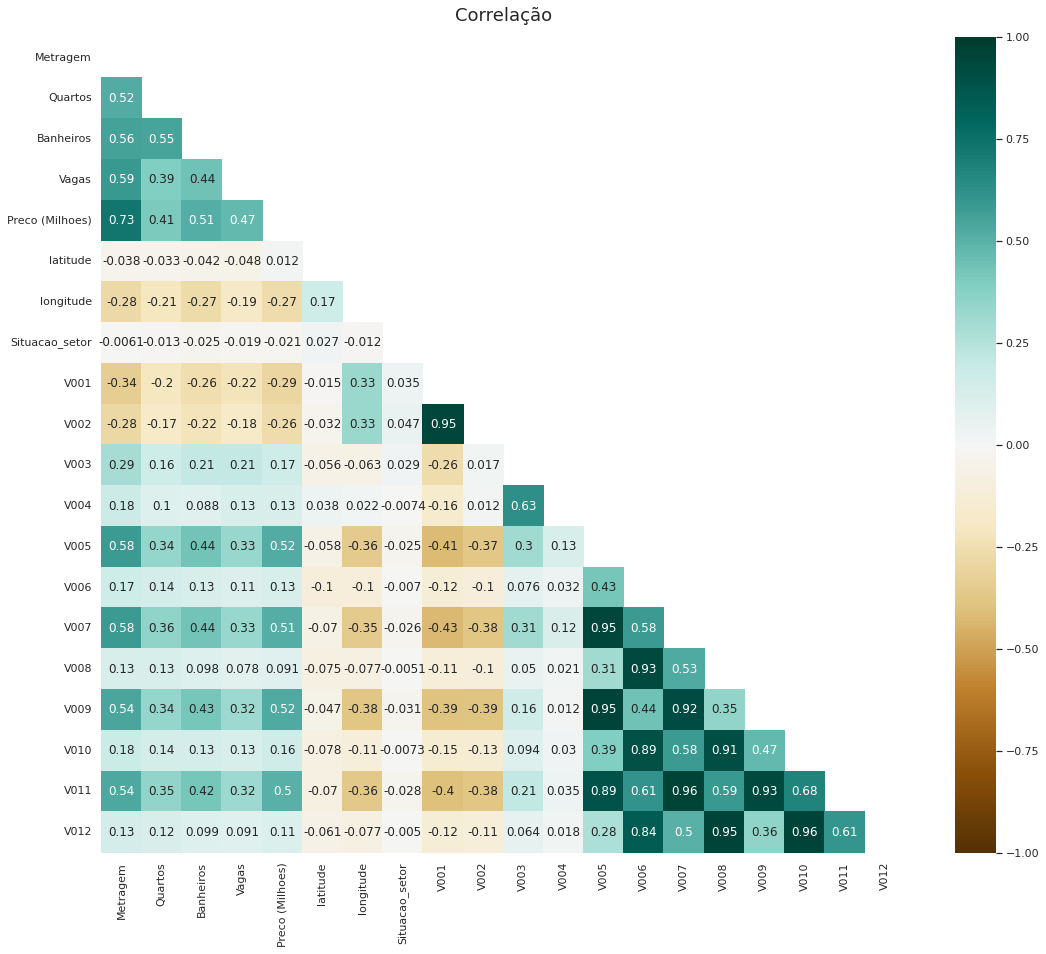

In [73]:
plt.figure(figsize=(18, 15))
#https://www.tylervigen.com/spurious-correlations
mask = np.triu(np.ones_like(dados_vendas_censo_filtered_valor.corr(), dtype=bool))
heatmap = sns.heatmap(dados_vendas_censo_filtered_valor.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlação', fontdict={'fontsize':18}, pad=16);

Valores próximos de 1, são variáveis fortemente correlacionados, enquanto que valores próximos a -1 indicam variáveis pouco correlacionados.Observou-se que algumas variáveis apresentam forte correlação um com o outro. 

## Avaliação da metragem, número de vagas, banheiros e quartos no preço do imóvel.

Realizamos uma primeira avaliação do preço do imóvel com base em atributos como número de quartos, banheiros e vagas, e a metragem. Para isso, utilizamos os dados abaixo.

In [74]:
lr = LinearRegression()

X1 = dados_vendas_censo_filtered_valor[['Metragem', 'Quartos', 'Banheiros', 'Vagas']]

Y1 = dados_vendas_censo_filtered_valor["Preco (Milhoes)"]


In [75]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.3)

#Treinamos o modelo a partir do X1_train e Y1_train

lr.fit(X1_train, Y1_train)

#Com os dados separados, predizemos o valor do imóvel com os dados utilizados para teste e para treino em duas partes.

Y1_predict_test = lr.predict(X1_test)
Y1_predict_train = lr.predict(X1_train)


In [76]:
X1_train

,Metragem,Quartos,Banheiros,Vagas
5415,535,4,5,7
3565,105,4,2,3
2981,400,4,6,5
5602,245,5,4,3
2374,120,1,2,1
...,...,...,...,...
709,470,5,4,8
800,320,6,4,8
2556,225,4,4,2
4664,90,3,2,4


In [77]:
X1_test

,Metragem,Quartos,Banheiros,Vagas
190,1039,6,7,20
1497,170,3,3,5
4740,121,2,1,2
383,380,4,3,5
616,471,3,6,6
...,...,...,...,...
5464,289,5,3,4
3073,193,3,3,3
4182,190,3,2,2
3695,503,4,3,4


In [78]:
Y1_train

5415    4.10
3565    0.65
2981    7.00
5602    0.64
2374    0.65
        ... 
709     3.50
800     1.80
2556    2.45
4664    1.00
3439    2.00
Name: Preco (Milhoes), Length: 2720, dtype: float64

In [79]:
Y1_test

190     22.000000
1497     0.950000
4740     0.264214
383      1.350000
616      2.800000
          ...    
5464     1.300000
3073     1.300000
4182     1.045000
3695     4.350000
6        0.450000
Name: Preco (Milhoes), Length: 1167, dtype: float64

In [80]:
# Obtivemos os coeficientes de correlação;
print("Coeficiente: \n", lr.coef_)

# O erro médio quadrático; e
print("Erro médio quadrático: %.2f" % mean_squared_error(Y1_test, Y1_predict_test))

# calculamos o coeficiente de determinação da equação obtida. Quanto mais próximo de 1, melhor a predição.
print("Coeficiente de determinação: %.2f" % r2_score(Y1_test, Y1_predict_test))


Coeficiente: 
 [ 0.00642517 -0.06806942  0.23149663  0.05680329]
Erro médio quadrático: 3.32
Coeficiente de determinação: 0.51


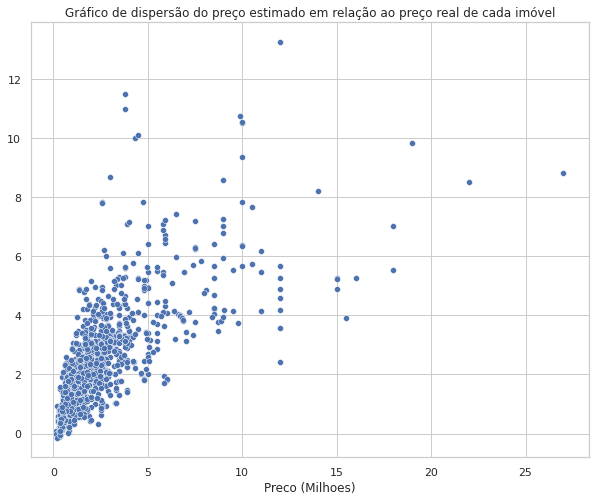

In [81]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 8))
plt.title("Gráfico de dispersão do preço estimado em relação ao preço real de cada imóvel")
plot_reg1 = sns.scatterplot(x=Y1_test, y=Y1_predict_test)
plt.show()

O coeficiente de determinação 0.58 indica que a regressão não prediz com acurácia os preços dos imóveis com base nos atributos estipulados.
Diante disso, vamos avaliar novamente um novo modelo, porém contendo as informações do IBGE.

In [82]:
X2 = dados_vendas_censo_filtered_valor[['V001', 'V002', 'V003', 'V004', 'V005', 'V006', 'V007', 'V008', 'V009', 'V010', 'V011', 'V012']]

Y2 = dados_vendas_censo_filtered_valor["Preco (Milhoes)"]


Separamos novamente os dados com base nas mesmas condições.

In [83]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.3, random_state=60)

#Treinamos o modelo a partir do X1_train e Y1_train

lr.fit(X2_train, Y2_train)

#Com os dados separados, predizemos o valor do imóvel com os dados utilizados para teste e para treino em duas partes.

Y2_predict_test = lr.predict(X2_test)
Y2_predict_train = lr.predict(X2_train)


In [84]:
# Obtivemos os coeficientes de correlação;
print("Coeficiente: \n", lr.coef_)

# O erro médio quadrático; e
print("Erro médio quadrático: %.2f" % mean_squared_error(Y2_test, Y2_predict_test))

# calculamos o coeficiente de determinação da equação obtida. Quanto mais próximo de 1, melhor a predição.
print("Coeficiente de determinação: %.2f" % r2_score(Y2_test, Y2_predict_test))

Coeficiente: 
 [-1.56986603e-02  4.75011406e-03 -1.54344811e+00  7.63449266e-01
 -3.26848008e-04  2.86592124e-09  3.76890066e-04 -2.57494131e-09
  3.93361483e-04 -6.10359631e-09  1.25636062e-04  3.08463975e-09]
Erro médio quadrático: 4.33
Coeficiente de determinação: 0.34


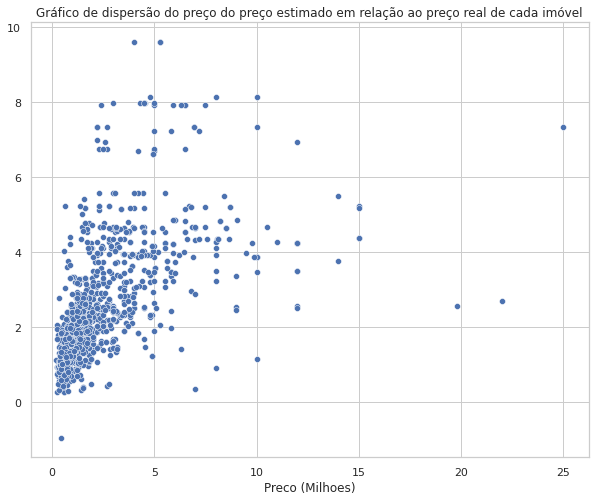

In [85]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 8))
plt.title("Gráfico de dispersão do preço do preço estimado em relação ao preço real de cada imóvel")
plot_reg2 = sns.scatterplot(x=Y2_test, y=Y2_predict_test)
plt.show()

Os dados obtidos pelo IBGE pouco prediz o valor do imóvel. Neste caso, as características da casa como metragem e numero de cômodos influenciou mais o preço em relação a condição financeira do morador. Agora, iremos utilizar todos os atributos em questão para predizer o valor do imóvel. 

In [86]:
X3 = dados_vendas_censo_filtered_valor[['Metragem', 'Quartos', 'Banheiros', 'Vagas', 'V001', 'V002', 'V003', 'V004', 'V005', 'V006', 'V007', 'V008', 'V009', 'V010', 'V011', 'V012']]

Y3 = dados_vendas_censo_filtered_valor["Preco (Milhoes)"]

In [87]:
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size = 0.3, random_state=60)

#Treinamos o modelo a partir do X1_train e Y1_train

lr.fit(X3_train, Y3_train)

#Com os dados separados, predizemos o valor do imóvel com os dados utilizados para teste e para treino em duas partes.

Y3_predict_test = lr.predict(X3_test)
Y3_predict_train = lr.predict(X3_train)


In [88]:
# Obtivemos os coeficientes de correlação;
print("Coeficiente: \n", lr.coef_)

# O erro médio quadrático; e
print("Erro médio quadrático: %.2f" % mean_squared_error(Y3_test, Y3_predict_test))

# calculamos o coeficiente de determinação da equação obtida. Quanto mais próximo de 1, melhor a predição.
print("Coeficiente de determinação: %.2f" % r2_score(Y3_test, Y3_predict_test))

Coeficiente: 
 [ 6.42831516e-03 -8.69313574e-02  1.20955331e-01  2.87479724e-02
 -1.97586307e-02  6.51482117e-03 -1.96773104e+00  4.94611350e-01
 -2.95527745e-04  1.77007125e-09  1.86470156e-04 -1.47393175e-09
  5.22876823e-04 -3.67157064e-09 -6.71175743e-06  1.82317741e-09]
Erro médio quadrático: 2.57
Coeficiente de determinação: 0.61


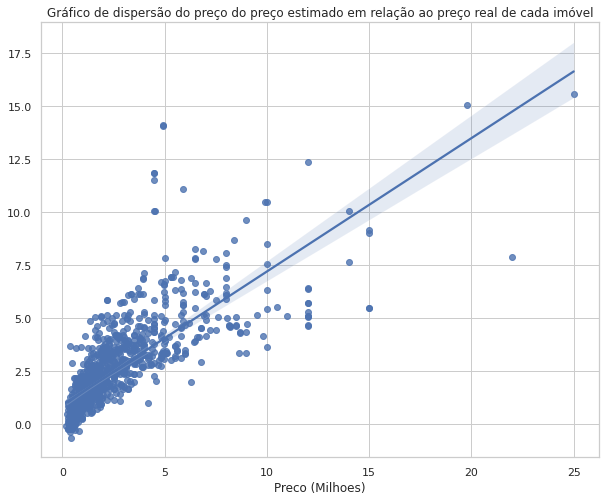

In [89]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 8))
plt.title("Gráfico de dispersão do preço do preço estimado em relação ao preço real de cada imóvel")
plot_reg3 = sns.regplot(x=Y3_test, y=Y3_predict_test)
plt.show()

Com todos os atributos incluidos, o coeficiente de determinação foi para 0.61. Avaliando o gráfico acima, os pontos estão muito dispersos em relação a linha. Ou seja, o modelo não não consegue representar fidedignamente o valor do imóvel.

# 4. Conclusões Parciais

Com os dados obtidos pelo IBGE e pela plataforma kaggle para predição do preço dos imóveis de São Paulo, foi possível desenvolver um modelo de aprendizado de máquina por regressão linear multivariada. No entanto, os dados obtidos pelo IBGE pouco influenciaram no aumento de performance no modelo de regressão. Já no caso dos atributos obtidos em conjunto com o valor do imóvel (Metragem, nº de quartos, banheiros...), as variáveis conseguiram promover maior performance no modelo de regressão linear. 

# 5. Agradecimentos

  Gostaria de agradecer imensamente a todo o time de Imersão Dados 2022 Vivian Mayumi Yamassaki, Thiago Gonçalves e ao Paulo Silveira. Sem eles não seria possível desenvolver este trabalho de muitos que ainda virão.